In [ ]:
### Key Import (Changes with updated to Tensorflow)
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# batch, classes, epochs
batch_size = 32
num_classes = 10
epochs = 50

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)


In [ ]:
print(y_train.shape)

(50000, 1)


In [ ]:
print(x_test.shape)

(10000, 32, 32, 3)


In [ ]:
print(y_test.shape)

(10000, 1)


In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


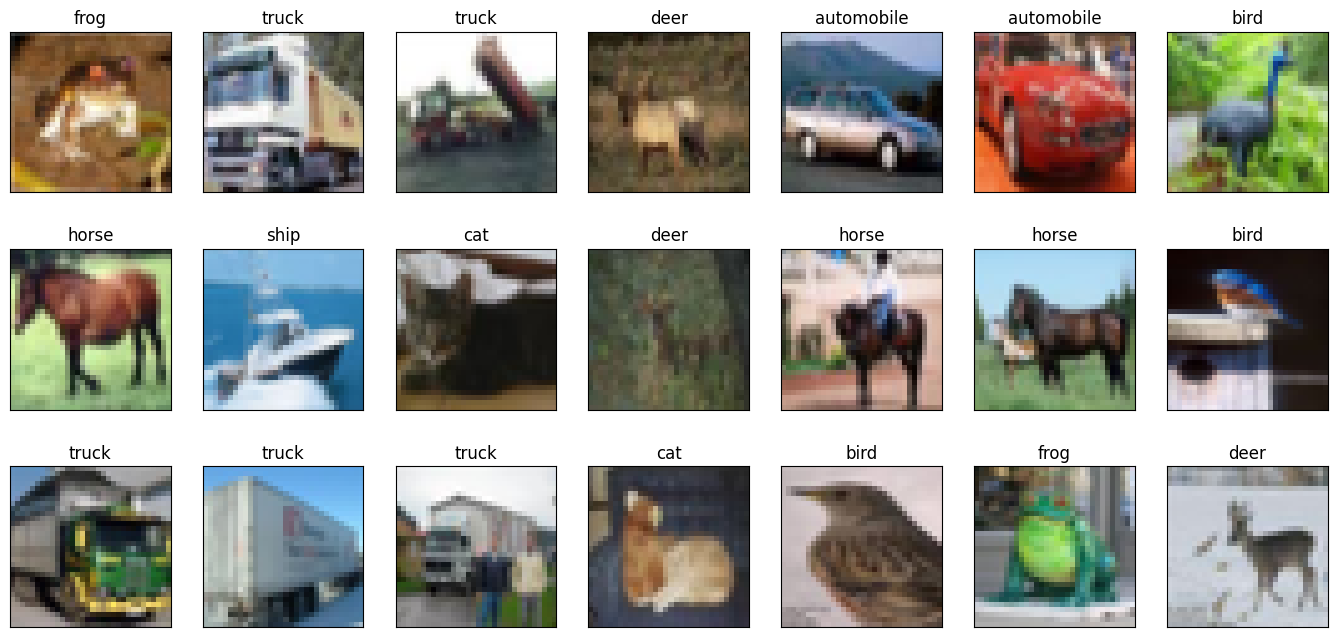

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(class_names[y_train[index][0]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train,num_classes=num_classes)  ### One Hot Encoding
y_test_one_hot = tf.keras.utils.to_categorical(y_test,num_classes=num_classes)     ### One Hot Encoding

In [ ]:
print(y_train[1])

[9]


In [ ]:
print(y_train_one_hot[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
model = Sequential()

In [ ]:
x_train.shape[1:]

(32, 32, 3)

Experiment - I (Using dropouts after convolution layer and Fully Connected layers, With no Batch Normalization):

In [ ]:
model.add(Conv2D(32,(3,3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('LeakyReLU'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))   ### Padding = Same results in the same output image as the input image with a stride of 1.
model.add(Activation('LeakyReLU'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))                          ### Dense Layer of 512 Neurons.
model.add(Activation('LeakyReLU'))
model.add(Dropout(0.5))                        ### Since its a fully connect layer the dropout is high, meaning we can expect half of the neuron to be redundant.
model.add(Dense(num_classes))
model.add(Activation('softmax'))              ### Softmax Layer Since we have 10 classes.

In [ ]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# convert to float, normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# train
model.fit(x_train, y_train_one_hot,
          batch_size=batch_size,epochs=epochs,
          validation_data=(x_test, y_test_one_hot),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 21s 7ms/step - loss: 1.3430 - accuracy: 0.5222 - val_loss: 0.9914 - val_accuracy: 0.6592
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9931 - accuracy: 0.6543 - val_loss: 0.8422 - val_accuracy: 0.7045
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9056 - accuracy: 0.6830 - val_loss: 0.8000 - val_accuracy: 0.7214
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8499 - accuracy: 0.7040 - val_loss: 0.7835 - val_accuracy: 0.7282
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8176 - accuracy: 0.7163 - val_loss: 0.7349 - val_accuracy: 0.7441
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7856 - accuracy: 0.7293 - val_loss: 0.7284 - val_accuracy: 0.7478
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7695 - accuracy: 0.7319 - val_loss: 0.7735 - val_accura

Experiment- I Results :


1.  Training Accuracy(69.34%)
2.  Validation Accuracy(76.87%)



Experiment - II (Remove dropouts from convolution layers, retain dropouts in FullyConnected Layer, use Batch Normalization)

In [ ]:
model_2 = Sequential()

In [ ]:
model_2.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32,(3,3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))


model_2.add(Conv2D(64,(3,3),padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64,(3,3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [ ]:
print(model_2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                      

In [ ]:
# compile the model
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_2.fit(x_train, y_train_one_hot,
          batch_size=batch_size,epochs=epochs,
          validation_data=(x_test, y_test_one_hot),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 25s 15ms/step - loss: 1.4446 - accuracy: 0.4953 - val_loss: 1.0426 - val_accuracy: 0.6285
Epoch 2/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9692 - accuracy: 0.6623 - val_loss: 0.9231 - val_accuracy: 0.6801
Epoch 3/50
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7996 - accuracy: 0.7205 - val_loss: 0.7544 - val_accuracy: 0.7380
Epoch 4/50
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6912 - accuracy: 0.7606 - val_loss: 0.7152 - val_accuracy: 0.7546
Epoch 5/50
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5945 - accuracy: 0.7927 - val_loss: 0.6975 - val_accuracy: 0.7641
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5147 - accuracy: 0.8217 - val_loss: 0.7488 - val_accuracy: 0.7528
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4401 - accuracy: 0.8458 - val_loss: 0.6444 -

Experiment- II Results :


1.  Training Accuracy(97.81%)
2.  Validation Accuracy(80.01%)

Significant Dropoff on validation accuracy. Models too complex and hence is overfitting

Experiment- III (Use dropouts after conv and FC layers, use BN)

In [ ]:
model_3 = Sequential()

In [ ]:
model_3.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

In [ ]:
# compile the model
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_3.fit(x_train, y_train_one_hot,
          batch_size=batch_size,epochs=epochs,
          validation_data=(x_test, y_test_one_hot),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 25s 15ms/step - loss: 1.5307 - accuracy: 0.4680 - val_loss: 1.4691 - val_accuracy: 0.5115
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0551 - accuracy: 0.6324 - val_loss: 0.9051 - val_accuracy: 0.6737
Epoch 3/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8967 - accuracy: 0.6869 - val_loss: 0.9105 - val_accuracy: 0.6985
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7993 - accuracy: 0.7212 - val_loss: 0.9075 - val_accuracy: 0.6877
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7243 - accuracy: 0.7477 - val_loss: 0.7075 - val_accuracy: 0.7543
Epoch 6/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6677 - accuracy: 0.7679 - val_loss: 0.6737 - val_accuracy: 0.7695
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6210 - accuracy: 0.7849 - val_loss: 0.8074 -

Experiment- III Results :


1.  Training Accuracy(93.77%)
2.  Validation Accuracy(82.821%)

Much Better fit of the model


Experiment - IV (Remove dropouts from conv layers, use L2 + dropouts in FC, use BN)

In [ ]:
model_4 = Sequential()

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
model_4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())
model_4.add(Dense(512,kernel_regularizer = l2(0.01)))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

In [ ]:
model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_4.fit(x_train, y_train_one_hot,
          batch_size=batch_size,epochs=epochs,
          validation_data=(x_test, y_test_one_hot),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 23s 14ms/step - loss: 2.8627 - accuracy: 0.5111 - val_loss: 1.6138 - val_accuracy: 0.6374
Epoch 2/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.6050 - accuracy: 0.6549 - val_loss: 1.6324 - val_accuracy: 0.6508
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5306 - accuracy: 0.6905 - val_loss: 1.5514 - val_accuracy: 0.6888
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4844 - accuracy: 0.7120 - val_loss: 1.4346 - val_accuracy: 0.7258
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4353 - accuracy: 0.7284 - val_loss: 1.6043 - val_accuracy: 0.6799
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4153 - accuracy: 0.7419 - val_loss: 1.4860 - val_accuracy: 0.7160
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3688 - accuracy: 0.7554 - val_loss: 1.4968 -

With Simply L2 Regularization the Model Overfits again

Experiment V - Putting everything together

In [ ]:
model_5 = Sequential()

In [ ]:
model_5.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(32, (3, 3)))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))


model_5.add(Conv2D(64, (3, 3), padding='same'))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(64, (3, 3)))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))



model_5.add(Flatten())
model_5.add(Dense(512,kernel_regularizer = l2(0.01)))
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(num_classes))
model_5.add(Activation('softmax'))

In [ ]:
model_5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_5.fit(x_train, y_train_one_hot,
          batch_size=batch_size,epochs=epochs,
          validation_data=(x_test, y_test_one_hot),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 24s 14ms/step - loss: 3.2836 - accuracy: 0.4650 - val_loss: 1.8423 - val_accuracy: 0.5863
Epoch 2/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.7774 - accuracy: 0.6145 - val_loss: 1.7400 - val_accuracy: 0.6336
Epoch 3/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7044 - accuracy: 0.6491 - val_loss: 1.7788 - val_accuracy: 0.6322
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6722 - accuracy: 0.6715 - val_loss: 1.7320 - val_accuracy: 0.6581
Epoch 5/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6356 - accuracy: 0.6860 - val_loss: 1.5346 - val_accuracy: 0.7214
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5888 - accuracy: 0.6995 - val_loss: 1.5432 - val_accuracy: 0.7139
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5676 - accuracy: 0.7089 - val_loss: 1.5920 -

Experiment VI : Using the VGG16 Architecture

In [ ]:
vgg = Sequential()

In [ ]:
vgg.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
vgg.add(Activation('relu'))
vgg.add(BatchNormalization())
vgg.add(Conv2D(32, (3, 3)))
vgg.add(Activation('relu'))
vgg.add(BatchNormalization())
vgg.add(MaxPooling2D(pool_size=(2, 2)))
vgg.add(Dropout(0.25))


vgg.add(Conv2D(64, (3, 3), padding='same'))
vgg.add(Activation('relu'))
vgg.add(BatchNormalization())
vgg.add(Conv2D(64, (3, 3)))
vgg.add(Activation('relu'))
vgg.add(BatchNormalization())
vgg.add(MaxPooling2D(pool_size=(2, 2)))
vgg.add(Dropout(0.25))

vgg.add(Conv2D(128, (3, 3), padding='same'))
vgg.add(Activation('relu'))
vgg.add(BatchNormalization())
vgg.add(Conv2D(128, (3, 3)))
vgg.add(Activation('relu'))
vgg.add(BatchNormalization())
vgg.add(MaxPooling2D(pool_size=(2, 2)))
vgg.add(Dropout(0.25))


vgg.add(Flatten())
vgg.add(Dense(512,kernel_regularizer = l2(0.01)))
vgg.add(Activation('relu'))
vgg.add(Dropout(0.5))
vgg.add(Dense(num_classes))
vgg.add(Activation('softmax'))

In [ ]:
vgg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
print(vgg.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fecd409fa10>>


In [ ]:
VGG16 = vgg.fit(x_train, y_train_one_hot,
          batch_size=batch_size,epochs=epochs,
          validation_data=(x_test, y_test_one_hot),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 29s 17ms/step - loss: 2.5566 - accuracy: 0.4639 - val_loss: 1.3449 - val_accuracy: 0.6023
Epoch 2/50
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3021 - accuracy: 0.6213 - val_loss: 1.1896 - val_accuracy: 0.6651
Epoch 3/50
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1572 - accuracy: 0.6823 - val_loss: 1.2634 - val_accuracy: 0.6452
Epoch 4/50
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0643 - accuracy: 0.7200 - val_loss: 0.9738 - val_accuracy: 0.7529
Epoch 5/50
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0075 - accuracy: 0.7422 - val_loss: 0.9116 - val_accuracy: 0.7685
Epoch 6/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9593 - accuracy: 0.7612 - val_loss: 0.8711 - val_accuracy: 0.7890
Epoch 7/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9236 - accuracy: 0.7744 - val_loss: 0.8926 -

In [ ]:
Measures = VGG16.history

In [ ]:
Measures.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(Measures)

dict

In [ ]:
epochs_df = list(range(1,51))
print(epochs_df)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [ ]:
import pandas as pd
VGG16_Metrics = pd.DataFrame(epochs_df,columns=['Epochs'])

In [ ]:
VGG16_Metrics['Training_Loss'] = Measures['loss']
VGG16_Metrics['Training_Accuracy'] = Measures['accuracy']
VGG16_Metrics['Val_loss'] = Measures['val_loss']
VGG16_Metrics['Val_accuracy'] = Measures['val_accuracy']

In [ ]:
VGG16_Metrics.head()

,Epochs,Training_Loss,Training_Accuracy,Val_loss,Val_accuracy
0,1,2.556554,0.46390,1.344919,0.6023
1,2,1.302073,0.62128,1.189622,0.6651
2,3,1.157215,0.68232,1.263371,0.6452
3,4,1.064323,0.72000,0.973832,0.7529
4,5,1.007547,0.74216,0.911576,0.7685


In [ ]:
fig_acc = px.line(VGG16_Metrics,x='Epochs',y='Training_Accuracy',template='ggplot2',labels={'Training_Accuracy':'Training Accuracy'})
fig_acc.add_scatter(x=VGG16_Metrics['Epochs'],y=VGG16_Metrics['Val_accuracy'],mode='lines',name='Validation accuracy')

In [ ]:
fig_acc = px.line(VGG16_Metrics,x='Epochs',y='Training_Loss',template='ggplot2',labels={'Training_Loss':'Training Loss'})
fig_acc.add_scatter(x=VGG16_Metrics['Epochs'],y=VGG16_Metrics['Val_loss'],mode='lines',name='Validation Loss')